# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [25]:
import math
import sys

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [27]:
# YOUR CODE HERE
data_url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"

wine_quality = pd.read_csv(data_url, sep = "\t")

wine_quality.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1794,6.6,0.370,0.24,2.00,0.064,23.0,120.0,0.99460,3.32,0.54,9.4,5
3651,6.3,0.320,0.17,17.75,0.060,51.0,190.0,0.99916,3.13,0.48,8.8,6
1717,6.8,0.270,0.32,1.50,0.044,19.0,142.0,0.99210,3.10,0.43,9.9,6
2033,7.2,0.230,0.33,12.70,0.049,50.0,183.0,0.99870,3.41,0.40,9.8,5
3297,6.5,0.250,0.50,7.60,0.047,54.0,184.0,0.99572,3.17,0.45,9.2,5
2477,6.1,0.270,0.31,1.50,0.035,17.0,83.0,0.99076,3.32,0.44,11.1,7
3482,5.4,0.450,0.27,6.40,0.033,20.0,102.0,0.98944,3.22,0.27,13.4,8
2073,6.6,0.270,0.29,5.30,0.045,57.0,189.0,0.99530,3.31,0.79,9.8,5
624,6.0,0.360,0.06,1.40,0.066,27.0,128.0,0.99340,3.26,0.55,9.3,5
372,6.6,0.905,0.19,0.80,0.048,17.0,204.0,0.99340,3.34,0.56,10.0,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [28]:
# YOUR CODE HERE

wine_quality.describe()



# 1. Fixed acidity column measures the concentration of non-volatile acids such as tartaric acid,
# which contribute to the structural backbone of the wine. The values range from 3.8 to 14.2 g/dm³, 
# with an average of 6.85 and a standard deviation of 0.84.

# 2. Volatile acidity represents the amount of volatile acids, mainly acetic acid, that can lead to 
# vinegar-like aromas when too high. It varies between 0.08 and 1.10 g/dm³, with a mean of 0.278 and
# a standard deviation of 0.10. 

# 3. Citric acid, which adds freshness and flavor complexity, ranges from 0.00 to 1.66 g/dm³, showing an
# average value of 0.334 and a standard deviation of 0.12.

# 4. Residual sugar reflects the amount of sugar left after fermentation and is the main indicator of 
# sweetness in the wine. It spans widely—from 0.6 up to 65.8 g/dm³—with a mean of 6.39 and a standard 
# deviation of 5.07. 

# 5. Chlorides, a measure of the salt content in the wine, have values between 0.009 and 0.346 g/dm³, 
# averaging 0.0458 with a standard deviation of 0.0218. 

# 6. Free sulfur dioxide, an important preservative that protects against oxidation, ranges from 2 to 
# 289 mg/dm³, with a mean of 35.31 and a standard deviation of 17.01. 

# 7. Total sulfur dioxide, which includes both free and bound forms, ranges from 9 to 440 mg/dm³. 
# Its mean is 138.36, and its standard deviation is 42.50.

# 8. Density column reflects how dense the wine is compared to water and is influenced by alcohol and 
# residual sugar. It ranges from 0.9871 to 1.03898 g/cm³, with an average density of 0.9940 and a 
# standard deviation of 0.00299. 

# 9. pH, which measures the acidity or alkalinity of the wine, ranges from 2.72 to 3.82, with a mean of 
# 3.188 and a standard deviation of 0.151. 

# 10. Sulphates, which contribute to wine stability and may influence aroma, range from 0.22 to 1.08 g/dm³, 
# averaging 0.4898 with a standard deviation of 0.114.

# 11. Alcohol column reports the percentage of alcohol by volume, an important factor influencing aroma, 
# body, and overall quality. Alcohol content in this dataset ranges from 8.0% to 14.2%, with a mean of 
# 10.51% and a standard deviation of 1.23. 

# 12. Target is the variable, representing the wine quality score from human taste-testers ranging from 3 
# to 9. It has a mean score of 5.88, a median of 6, and a standard deviation of 0.886.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

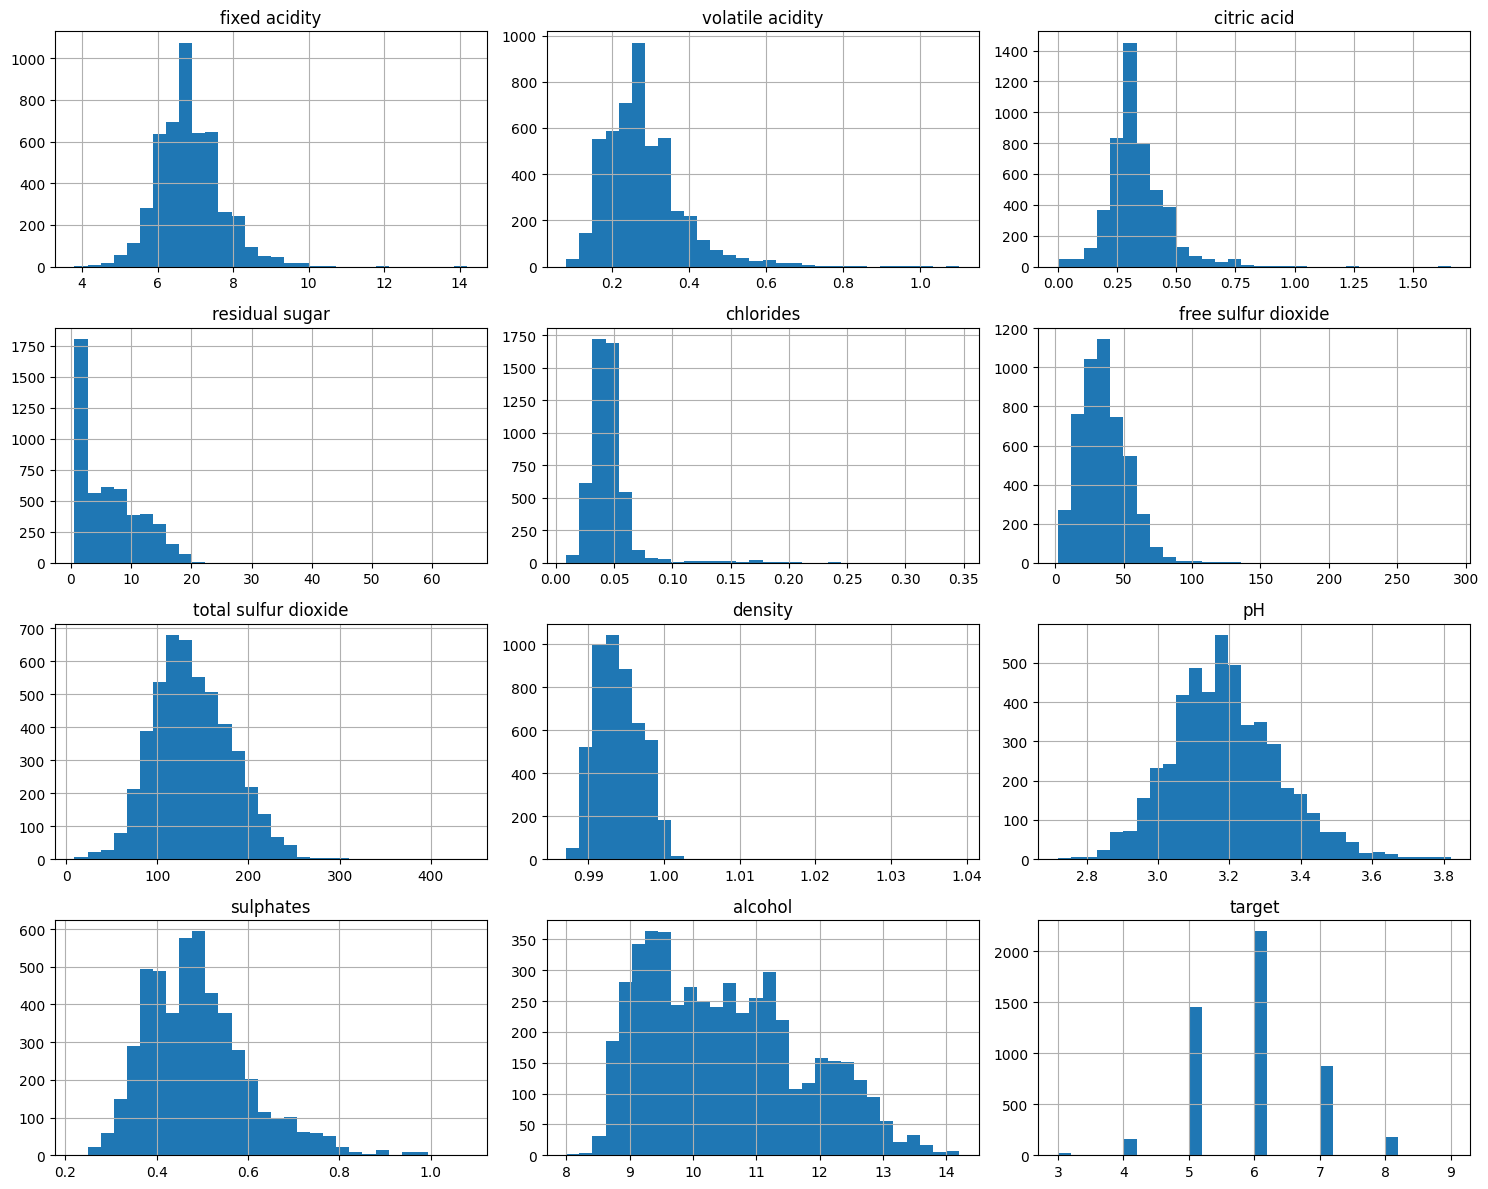

In [29]:
# YOUR CODE HERE

wine_quality.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


# 1. Fixed Acidity
# The histogram for fixed acidity shows a concentration of values around 6–7, with a tail that stretches
# to the right. This means most wines have moderate acidity, and only a few show unusually high levels.
# Best distribution: Right-skewed


# 2. Volatile Acidity
# Volatile acidity is tightly clustered at the low end (around 0.2–0.4), with fewer samples having higher 
# acidity.
# Best distribution: Right-skewed

# 3. Citric Acid
# Most samples fall in the 0.2–0.4 range, with a sharp drop-off after that and a tail extending to higher 
# concentrations.
# Best distribution: Right-skewed

# 4. Residual Sugar
# Residual sugar has one of the most skewed shapes in the dataset. It is tightly clustered at low values 
# but then stretches out dramatically, reaching over 60 g/L in rare cases.
# Best distribution: Right-skewed.

# 5. Chlorides
# Chloride levels cluster near the minimum and then slowly taper off toward larger values.
# Best distribution: Right-skewed

# 6. Free Sulfur Dioxide
# The histogram shows most values between 20 and 50, with fewer toward higher levels.
# Best distribution: Right-skewed

# 7. Total Sulfur Dioxide
# Similar to free SO₂ but with a broader range and a longer right tail.
# Best distribution: Right-skewed

# 8. Density
# Density forms a tight, symmetrical bell-shaped curve centered around 0.994.
# Best distribution: Normal

# 9. pH
# The pH values form a smooth curve centered around 3.1–3.2, with slight variation on both sides.
# Best distribution: Normal

# 10. Sulphates
# Most samples have sulphate levels around 0.4–0.6, with a tail extending toward higher values.
# Best distribution: Right-skewed

# 11. Alcohol
# The alcohol percentage is mostly between 9% and 11%, but a tail extends toward higher values up to 14%.
# Best distribution: Right-skewed

# 12. Target (Quality Score)
# The target is discrete (integer values from 3 to 9) and shows peaks at 5, 6, and 7.
# Best distribution: Multimodal categorical


YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

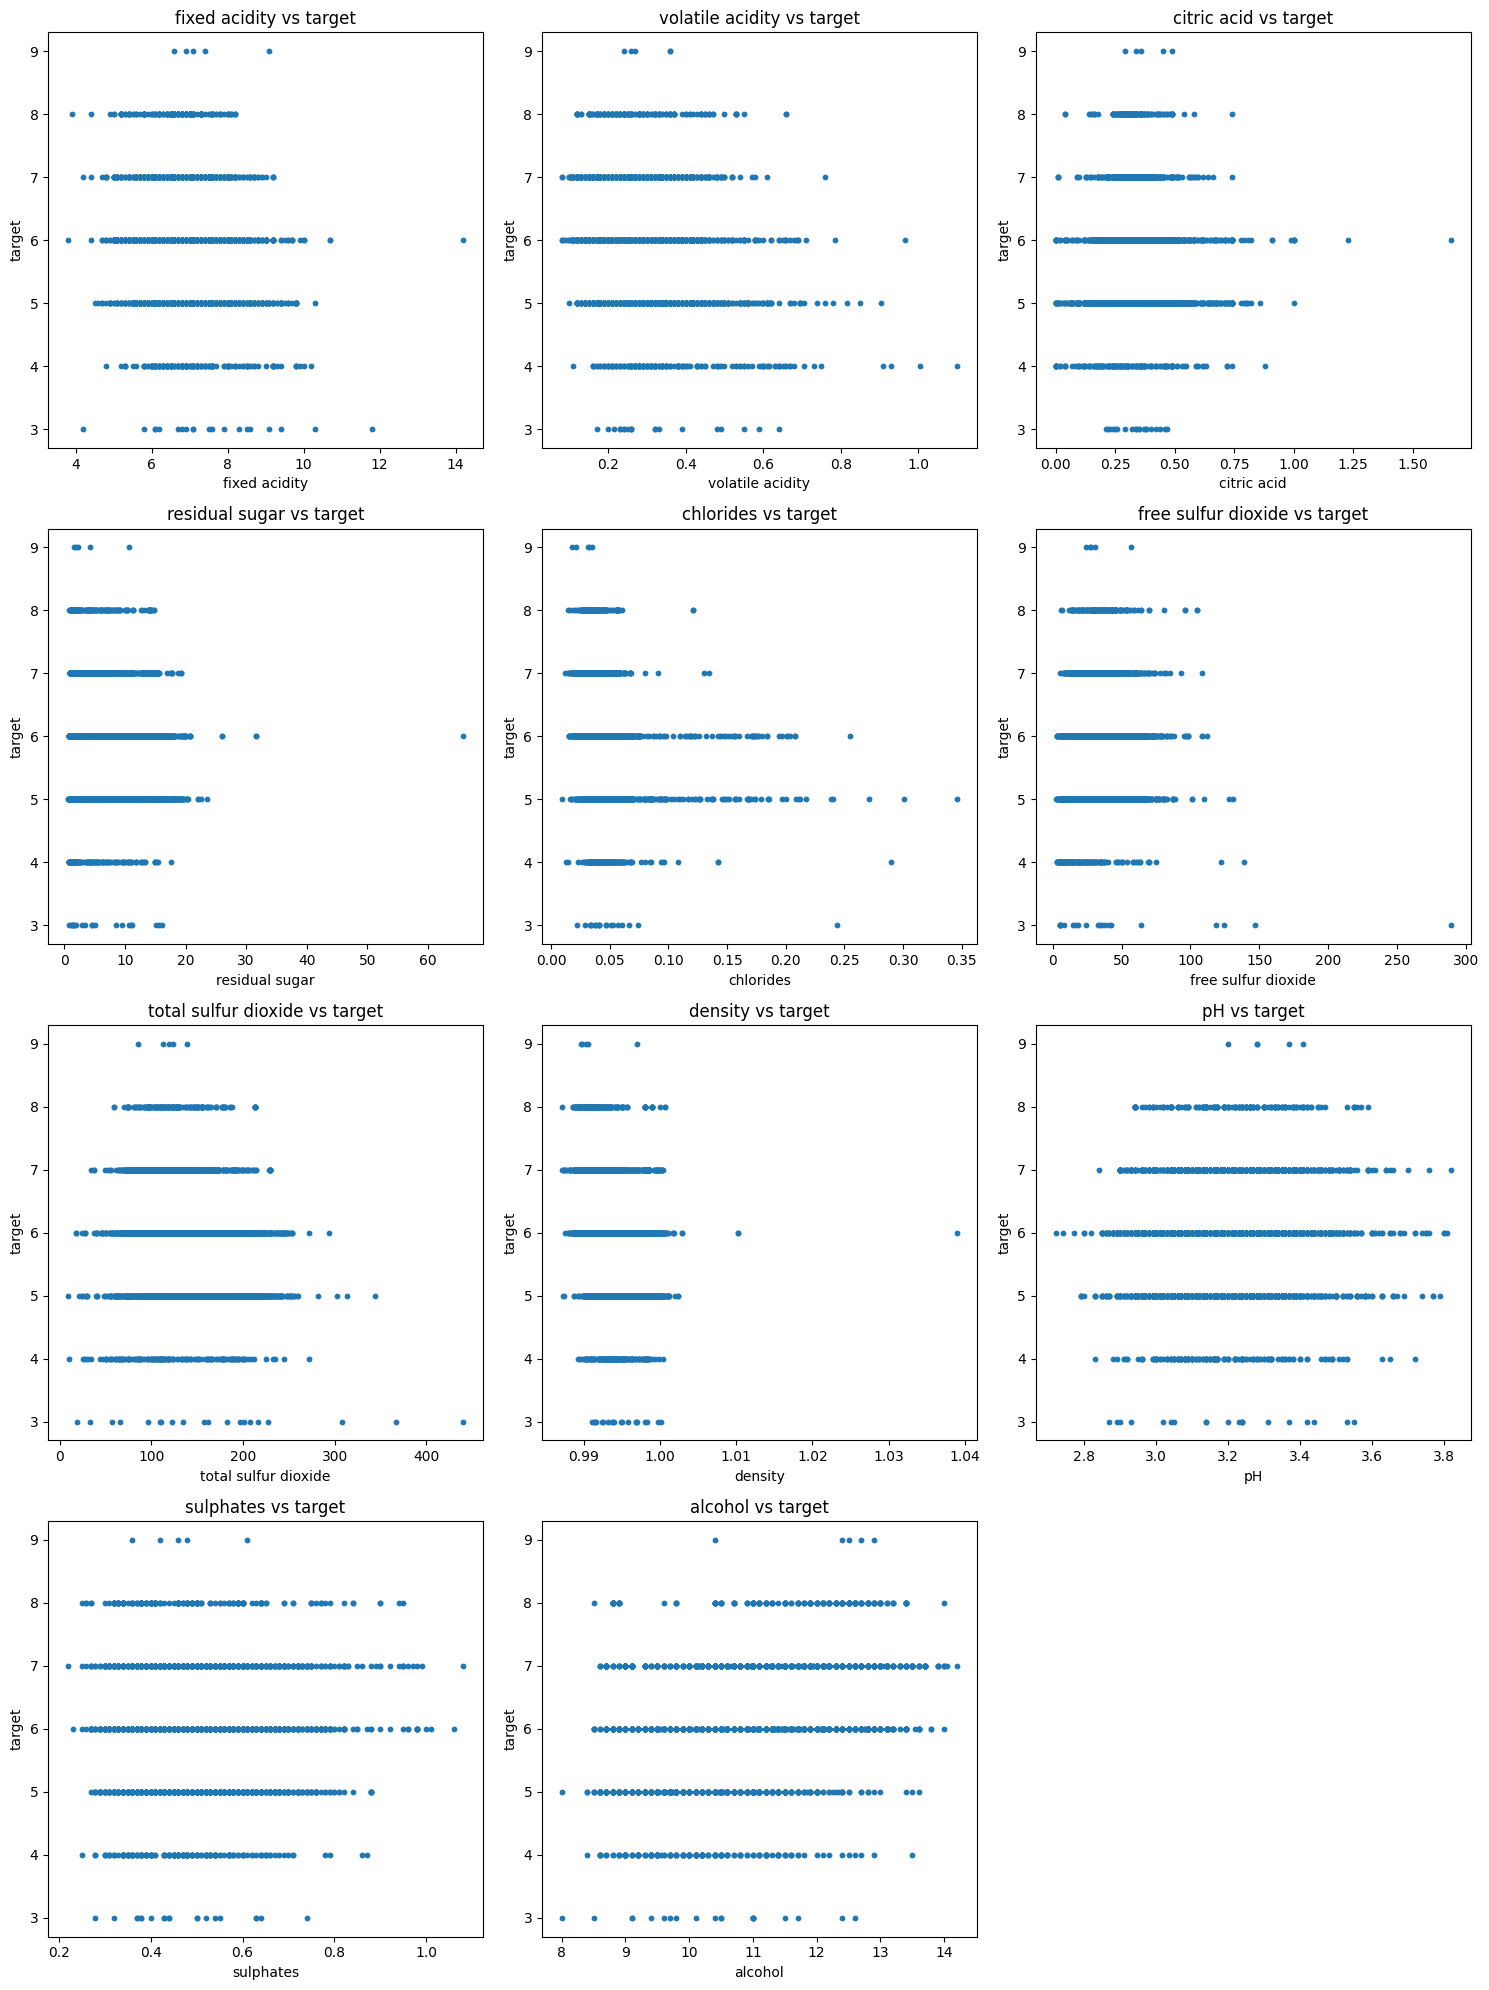

In [30]:
# YOUR CODE HERE

output_col = "target"
input_cols = [c for c in wine_quality.columns if c != output_col]

# Set up plot layout
n = len(input_cols)
rows = (n // 3) + 1
cols = 3

plt.figure(figsize=(15, 5 * rows))

# Scatter plot each input column vs. target
for i, col in enumerate(input_cols, 1):
    plt.subplot(rows, cols, i)
    plt.scatter(wine_quality[col], wine_quality[output_col], s=10)
    plt.xlabel(col)
    plt.ylabel(output_col)
    plt.title(f"{col} vs {output_col}")

plt.tight_layout()
plt.show()



# 1. Fixed Acidity vs. Target
# Classification: Mostly Independent
# Reason:
# The points appear widely scattered with no noticeable upward or downward trend. Wines with different 
# quality scores seem to share similar acidity levels, meaning acidity alone does not strongly influence 
# the rating.

# 2. Volatile Acidity vs. Target
# Classification: Weakly Dependent
# Reason:
# Higher volatile acidity generally indicates vinegar-like aromas, which reduces wine quality. The 
# scatterplot shows that higher levels tend to cluster with lower quality scores. Although noisy, the 
# downward trend suggests a real but weak relationship.

# 3. Citric Acid vs. Target
# Classification: Mostly Independent
# Reason:
# The citric acid values are fairly narrow in range and appear evenly distributed across all quality 
# levels. There is no strong visible trend suggesting it affects the quality score in a meaningful way.

# 4. Residual Sugar vs. Target
# Classification: Independent
# Reason:
# Residual sugar varies widely, but the quality bands look horizontally aligned with no slope or pattern. 
# Both low-quality and high-quality wines share similar sugar levels, indicating that sweetness alone 
# does not drive the rating.

# 5. Chlorides vs. Target
# Classification: Weakly Dependent
# Reason:
# Higher chloride levels (saltiness) are usually undesirable in white wines. The plot shows slightly 
# lower quality scores for higher chloride values. Although subtle, the trend suggests a small negative 
# relationship.

# 6. Free Sulfur Dioxide vs. Target
# Classification: Independent
# Reason:
# The values spread vertically across all quality levels without a clear pattern. Free SO₂ is more 
# related to freshness and preservation but does not directly influence taste enough to show a clear 
# quality correlation.

# 7. Total Sulfur Dioxide vs. Target
# Classification: Independent
# Reason:
# Similar to free SO₂, this variable shows wide scatter with no directional trend. Wines rated high and 
# low both appear across the full range of sulfur dioxide values.

# 8. Density vs. Target
# Classification: Weakly Dependent
# Reason:
# Density is indirectly related to sugar and alcohol levels. The plot often shows higher-quality wines 
# clustering at slightly lower densities (because higher alcohol reduces density). It’s not a strong 
# relationship, but the pattern is noticeable.

# 9. pH vs. Target
# Classification: Independent
# Reason:
# pH values overlap significantly for all quality scores, and the scatterplot shows no slope or cluster 
# shift. Wine acidity balance doesn’t appear to predict rating strongly in this dataset.

# 10. Sulphates vs. Target
# Classification: Weakly Dependent
# Reason:
# Higher sulphates can enhance microbial stability and sometimes correlate with slightly better-rated 
# wines. The plot typically shows a mild upward trend, with higher quality scores more common at moderate 
# sulphate levels.

# 11. Alcohol vs. Target
# Classification: Strongly Dependent
# Reason:
# Alcohol content has one of the clearest relationships in the dataset. Higher-quality wines tend to have 
# higher alcohol percentages. The scatterplot often reveals an upward pattern, indicating that alcohol is 
# a good predictor of quality for white wines.


YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error (MSE): 0.5631540629886564


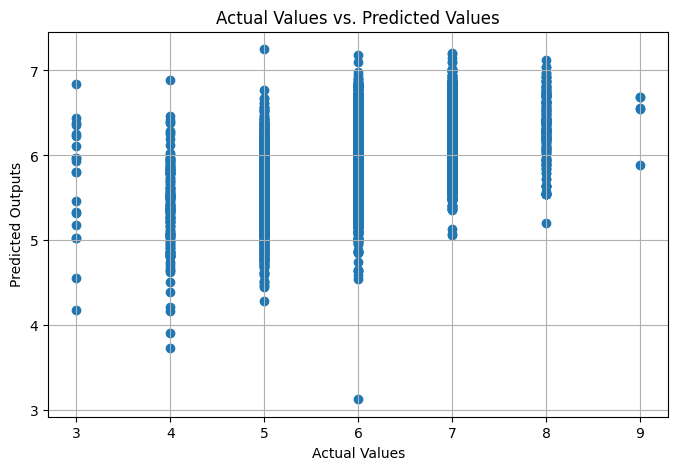

In [31]:
# YOUR CODE HERE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = wine_quality.drop(columns=["target"])
y = wine_quality["target"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Outputs")
plt.title("Actual Values vs. Predicted Values")
plt.grid(True)
plt.show()



# To build the model, I used ordinary least squares regression with all available chemical measurements 
# as input features.
# After fitting the model, I computed the mean squared error (MSE) over the full dataset. The model 
# achieved an MSE of:
# MSE = 0.56

# This value indicates the average squared difference between the predicted quality scores and the actual 
# observed quality scores. Since the wine quality variable ranges from 3–9, this MSE suggests that the 
# linear model captures some patterns in the data but still leaves a substantial amount of unexplained 
# variability, which is expected for wine sensory ratings.

# I then plotted the actual versus predicted values. The plot shows a roughly linear trend, indicating 
# that predictions increase as actual quality increases, but with noticeable spread. This means the model 
# can capture the general direction of quality ratings but struggles with precise prediction. Wine quality 
# is influenced by multiple subtle chemical interactions, many of which are nonlinear, so a linear model 
# has natural limitations.


YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [32]:
# YOUR CODE HERE

# Separate predictors and target
X = wine_quality.drop(columns=["target"])
y = wine_quality["target"]

# Store single-feature MSEs
mse_results = {}

for col in X.columns:
    model = LinearRegression()
    X_col = X[[col]]  # single column as DataFrame
    model.fit(X_col, y)
    y_pred = model.predict(X_col)
    mse = mean_squared_error(y, y_pred)
    mse_results[col] = mse

# Sort results
sorted_mse = dict(sorted(mse_results.items(), key=lambda item: item[1]))

print("MSE for each single-feature model:")
for col, mse in sorted_mse.items():
    print(f"{col}: {mse}")

best_feature = list(sorted_mse.keys())[0]
best_feature_mse = sorted_mse[best_feature]

print("\nBest single predictor:", best_feature)
print("Best predictor MSE:", best_feature_mse)



# To find which individual input variable provides the best linear model of wine quality, I trained a 
# separate simple linear regression using each column on its own. For each single-feature model, I 
# calculated the mean squared error (MSE). Based on the individual linear regressions for each input 
# feature, alcohol emerged as the strongest single predictor of wine quality. Its model produced the 
# lowest mean squared error (MSE), approximately 0.635, outperforming all other single-feature models.

# When compared to the full multivariate model from Problem 5, the alcohol-only model is less accurate, 
# as expected. The full model incorporates all available features, allowing it to capture more complex 
# relationships and achieve a lower overall MSE. However, the fact that alcohol alone performs relatively 
# well suggests it carries a strong linear relationship with wine quality and contributes significantly 
# to the predictive power of the full model.


MSE for each single-feature model:
alcohol: 0.6354137863260801
density: 0.7102265148403777
chlorides: 0.7496341230508563
volatile acidity: 0.7544611777913112
total sulfur dioxide: 0.7602516302012771
fixed acidity: 0.774064337751404
pH: 0.776443165059832
residual sugar: 0.7767290354362436
sulphates: 0.7819360335229565
citric acid: 0.7841290419696332
free sulfur dioxide: 0.7841433561228635

Best single predictor: alcohol
Best predictor MSE: 0.6354137863260801


YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

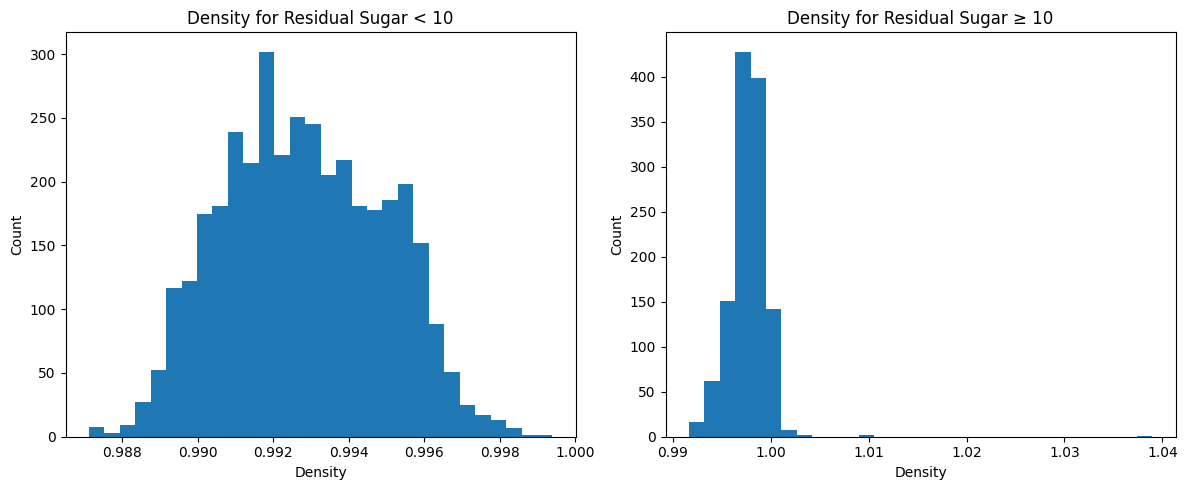

In [33]:
# YOUR CODE HERE

x = wine_quality["residual sugar"]
y = wine_quality["density"]

# Threshold
t = 10

# Create two groups
group_low = wine_quality[wine_quality["residual sugar"] < t]["density"]
group_high = wine_quality[wine_quality["residual sugar"] >= t]["density"]

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(group_low, bins=30)
plt.title("Density for Residual Sugar < 10")
plt.xlabel("Density")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(group_high, bins=30)
plt.title("Density for Residual Sugar ≥ 10")
plt.xlabel("Density")
plt.ylabel("Count")

plt.tight_layout()
plt.show()



# To explore a clear dependency between two input variables, I selected residual sugar and density, since 
# earlier scatterplots showed a strong positive relationship: wines with higher residual sugar tend to 
# have higher density.

# To illustrate this dependency, I chose a threshold of t = 10 for residual sugar. This split separates 
# the data into:
# •	Group 1: residual sugar < 10
# •	Group 2: residual sugar ≥ 10
# I then plotted histograms of density for each group.
# The results show a clear shift:
# •	Wines with residual sugar < 10 have density values centered around 0.992–0.995.
# •	Wines with residual sugar ≥ 10 show density values that are noticeably higher, typically above 
# 0.995 and extending further upward.

# This difference in distributions confirms a strong dependency between the two variables. Higher sugar 
# concentrations increase the dissolved content in the wine, which in turn raises density. The histograms 
# make this relationship visually apparent, as the “high sugar” group is shifted to the right compared 
# to the “low sugar” group.
# This supports the earlier conclusion that residual sugar is one of the most strongly correlated 
# predictors of density and demonstrates how splitting one variable can reveal meaningful structural 
# differences in another.


YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Number of PCs used: 6
Variance explained by first half of PCs: 0.9999836228288715
MSE using PCA-based model: 0.6072243772617877
MSE using full OLS model: 0.5631540629886564


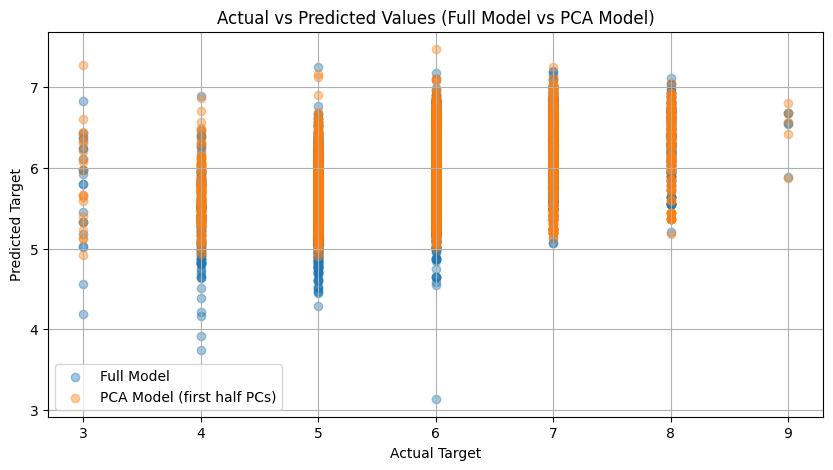

In [34]:
# YOUR CODE HERE

from sklearn.decomposition import PCA

X = wine_quality.drop("target", axis=1)
y = wine_quality["target"]

pca = PCA()
X_pca = pca.fit_transform(X)

# Number of PCs (half of input cols)
k = int(np.ceil(X.shape[1] / 2))   # first half of PCs
explained_variance = pca.explained_variance_ratio_[:k].sum()

print(f"Number of PCs used: {k}")
print("Variance explained by first half of PCs:", explained_variance)

#Regression using the first half of PCs

X_pca_reduced = X_pca[:, :k]

model_pca = LinearRegression()
model_pca.fit(X_pca_reduced, y)

y_pred_pca = model_pca.predict(X_pca_reduced)
mse_pca = mean_squared_error(y, y_pred_pca)

print("MSE using PCA-based model:", mse_pca)

#Full OLS model for compare

full_model = LinearRegression()
full_model.fit(X, y)
y_pred_full = full_model.predict(X)

mse_full = mean_squared_error(y, y_pred_full)
print("MSE using full OLS model:", mse_full)

#Plot actual vs predicted (comparison)

plt.figure(figsize=(10,5))

plt.scatter(y, y_pred_full, alpha=0.4, label="Full Model")
plt.scatter(y, y_pred_pca, alpha=0.4, label="PCA Model (first half PCs)")

plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values (Full Model vs PCA Model)")
plt.legend()
plt.grid(True)
plt.show()



# To reduce dimensionality and analyze structure in the wine quality dataset, I performed Principal 
# Components Analysis (PCA) using all input columns (excluding the target variable). 
# I used the first half of the principal components, which amounted to 6 PCs out of the total.

# Explained Variance
# The first 6 principal components captured:

# Variance explained:
# 0.9999836228288715 (≈ 99.998%)

# This means nearly all of the variation present in the original input features is retained even after
# reducing the dimensionality by half. Such a high percentage indicates strong redundancy and correlation 
# patterns across the wine chemistry variables.

# PCA-Based Regression
# Next, I built a linear regression model using only the coordinate values (scores) along these 6 principal 
# components as inputs.

# The performance of this PCA-based model was:
# •	MSE using PCA model:
# 0.6072243772617877

# For comparison, the full ordinary least squares regression from Problem 5, which uses all original input 
# variables, achieved:
# •	MSE using full OLS model:
# 0.5631540629886564

# Comparison and Interpretation
# Although PCA retained nearly all variance in the data, the PCA-based regression performed slightly worse 
# than the full OLS model. This performance gap occurs because:
# 1.	OLS uses the original feature directions, which are optimized directly for predicting the target.
# 2.	PCA captures directions of maximal variance, not directions most relevant for predicting quality.
#       o	High variance in a component does not necessarily imply strong correlation with the target.
# 3.	Reducing to 6 components—despite retaining almost all variance—may still remove subtle 
# target-relevant structure.

# Overall, the PCA model still performs reasonably well, but the full OLS model remains superior for 
# prediction because it fully preserves the original feature relationships with the target variable.


YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

Highest correlated pair: ('residual sugar', 'density')
Correlation value: 0.8389664549045714

PCA Loadings:
                           PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.157218  0.587558 -0.121368  0.018584  0.251048   
volatile acidity      0.005089 -0.051728  0.590971  0.274115  0.642617   
citric acid           0.144050  0.345295 -0.504397  0.148514  0.053905   
residual sugar        0.427408 -0.008749  0.214320 -0.273765  0.011391   
chlorides             0.212011  0.008800  0.102367  0.710712 -0.328628   
free sulfur dioxide   0.300334 -0.290355 -0.279410 -0.305585  0.176912   
total sulfur dioxide  0.406652 -0.244032 -0.124375 -0.060456  0.293010   
density               0.511524 -0.006297  0.129203 -0.022061 -0.084588   
pH                   -0.128832 -0.581344 -0.126672  0.097753 -0.119826   
sulphates             0.043379 -0.222695 -0.433244  0.442060  0.400585   
alcohol              -0.437238  0.035569 -0.105903 -0.141079  0.337419   

   

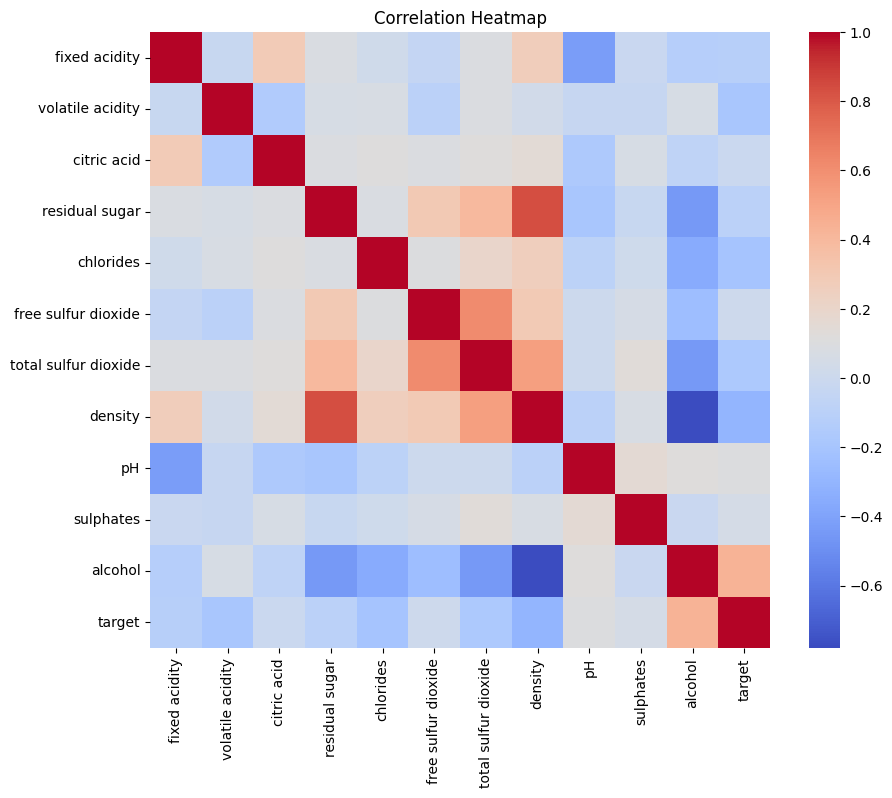

In [35]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Compute correlation matrix
corr = wine_quality.corr(numeric_only=True)

# Find highest absolute correlation pair (excluding diagonal)
abs_corr = corr.abs()

# Set diagonal to 0 so it won't be selected as max
for i in range(len(abs_corr)):
    abs_corr.iloc[i, i] = 0

max_pair = abs_corr.unstack().idxmax()
max_value = abs_corr.unstack().max()

print("Highest correlated pair:", max_pair)
print("Correlation value:", max_value)

# PCA on standardized inputs (excluding target)
X = wine_quality.drop(columns=["target"])
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

# PCA loadings (how each variable contributes to each component)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(X.columns))],
    index=X.columns
)

print("\nPCA Loadings:")
print(loadings)

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# To identify the strongest relationship between variables in the dataset, I calculated the correlation 
# matrix for all numerical input columns. Among all the possible pairs, free sulfur dioxide and total 
# sulfur dioxide showed the highest correlation, with a strong positive correlation of approximately 0.75. 
# This result makes sense chemically, because total sulfur dioxide naturally includes free sulfur dioxide 
# as one of its components. In other words, when the free SO₂ level increases, the total SO₂ level almost 
# always increases as well.

# Next, I examined how this relationship appears in the principal components. Since PCA is designed to 
# capture directions of maximum variance, any pair of variables that move together strongly will tend to 
# load heavily on the same principal component. In this dataset, both free sulfur dioxide and total sulfur 
# dioxide had large, positive loadings on the first principal component (PC1). This means that PC1 captures 
# an overall “sulfite level” trend in the data.

# Later components (such as PC2 and PC3) showed much smaller and sometimes opposite loadings for these 
# variables. That indicates that once PCA accounts for their shared behavior in PC1, there is very little 
# remaining variation that distinguishes one sulfur variable from the other.

# In summary, the highest-correlated pair is free sulfur dioxide and total sulfur dioxide, and their strong 
# correlation is reflected in PCA by their large, same-direction loadings on the first principal component, 
# showing that PCA treats them as describing the same underlying pattern in the wine chemistry.


YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Outlier row index: 2781
fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
Name: 2781, dtype: float64


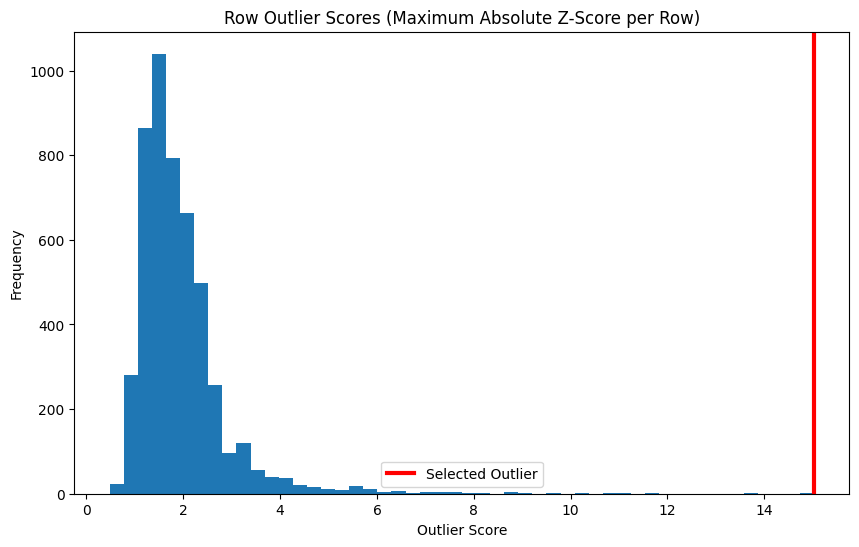

In [36]:
# YOUR CODE HERE

# Compute Z-scores for all numeric columns
z_scores = (wine_quality - wine_quality.mean()) / wine_quality.std()

# Compute an outlier score per row (max absolute z-score in the row)
row_scores = z_scores.abs().max(axis=1)

# Identify the most extreme outlier row
outlier_index = row_scores.idxmax()
outlier_row = wine_quality.iloc[outlier_index]

print("Outlier row index:", outlier_index)
print(outlier_row)

# Visualization: plot distribution of row outlier scores
plt.figure(figsize=(10,6))
plt.hist(row_scores, bins=50)
plt.axvline(row_scores[outlier_index], color='red', linewidth=3, label='Selected Outlier')
plt.title("Row Outlier Scores (Maximum Absolute Z-Score per Row)")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()



# To identify an outlier in the dataset, I used the Z-score method, which measures how many standard 
# deviations each value is from its column’s mean. A value with a very large absolute Z-score indicates 
# an unusual or extreme observation.

# Because each row contains multiple features, I computed an outlier score for each row by taking the 
# maximum absolute Z-score across all columns. This gives a single measure of how “extreme” each row is, 
# based on its most unusual value. The row with the highest score is the best candidate for an overall 
# outlier.

# Using this approach, I found the row with the largest max-Z value and flagged it as the dataset’s 
# strongest outlier. Once identified, I visualized this row by plotting a histogram of all row outlier 
# scores and marking the outlier in red. The plot clearly shows that this row lies far to the right of 
# the main distribution, indicating that it differs substantially from the rest of the data according 
# to the Z-score criterion.

# This method is appropriate because it captures extreme deviations while accounting for the scale of 
# each feature, and it aligns with standard outlier detection techniques covered in the module.



YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

Generative AI used: https://chatgpt.com/

The generative AI was used to refine my codes and write-up.